In [1]:
!pip install arabic_reshaper

# Importing Libraries

In [2]:

import pandas as pd  # Data manipulation library
import numpy as np   # Numerical computation library
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns   # Statistical data visualization library
from wordcloud import WordCloud  # Generating word clouds
from arabic_reshaper import arabic_reshaper  # Reshaping Arabic text for better display
from bidi.algorithm import get_display  # Reshaping Arabic text for better display

import torch  # PyTorch deep learning framework
import wandb  # Weights & Biases for experiment tracking
from sklearn.model_selection import train_test_split  # Splitting dataset into train and test sets
from transformers import AutoTokenizer, AutoModelForSequenceClassification  # Hugging Face Transformers library for NLP
from torch.utils.data import TensorDataset  # PyTorch data handling utilities
from transformers import Trainer, TrainingArguments  # Hugging Face Transformers library for model training
from sklearn.metrics import accuracy_score  # Evaluation metric for classification tasks

from kaggle_secrets import UserSecretsClient  # Kaggle-specific library for accessing user secrets

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Set maximum column width for Pandas display
pd.set_option('display.max_colwidth', None)
# Set Seaborn style and context
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)


2024-04-29 23:04:46.449821: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-29 23:04:46.449933: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-29 23:04:46.589614: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
data = pd.read_csv("/kaggle/input/arabic-resturant-reviews/Arabic_resturant_reviews.csv")
data

review  \
0                                                                                                                                  ÿßŸÑŸÖÿ∑ÿπŸÖ Ÿäÿ¨ŸÜŸÜ ŸàÿßŸÑÿßŸÉŸÑ ÿ™ÿ≠ŸÅÿ©   
1                                                                                         ÿ£ŸÜÿµÿ≠ ÿ®ÿ≤Ÿäÿßÿ±ÿ© ÿßŸÑŸÖÿ∑ÿπŸÖ ÿØŸá ÿ®ÿ¨ÿØÿå ÿßŸÑÿ£ŸÉŸÑ ÿπŸÜÿØŸáŸÖ ŸÑÿ∞Ÿäÿ∞ ŸàÿßŸÑÿÆÿØŸÖÿ© ŸÖÿ™ŸÖŸäÿ≤ÿ© ÿ¨ÿØÿßŸã.   
2                                                                                               ŸÑŸÇÿØ ŸÉÿßŸÜÿ™ ÿ™ÿ¨ÿ±ÿ®ÿ© ÿ≥Ÿäÿ¶ÿ©ÿå ÿßŸÑÿ∑ÿπÿßŸÖ ÿ∫Ÿäÿ± ŸÖŸÇÿ®ŸàŸÑ ŸàÿßŸÑÿÆÿØŸÖÿ© ÿ≥Ÿäÿ¶ÿ© ŸÑŸÑÿ∫ÿßŸäÿ©.   
3                                                                                               ÿßŸÑÿ∑ÿßŸÇŸÖ ÿ∫Ÿäÿ± ÿßÿ≠ÿ™ÿ±ÿßŸÅŸä ÿπŸÑŸâ ÿßŸÑÿ•ÿ∑ŸÑÿßŸÇÿå ŸàÿßŸÑÿÆÿØŸÖÿ© ÿ®ÿ∑Ÿäÿ¶ÿ© Ÿàÿ∫Ÿäÿ± ŸÅÿπŸëÿßŸÑÿ©.   
4                                                     ÿßŸÑÿ∑ÿπÿßŸÖ ŸÅŸä Ÿáÿ∞ÿß ÿßŸÑŸÖÿ∑ÿπŸÖ ŸÉÿßŸÜ ÿ≥Ÿäÿ¶Ÿãÿß ŸÑŸÑÿ∫ÿßŸäÿ© ŸàÿßŸÑÿÆÿØŸÖÿ© ŸÉÿßŸÜÿ™ ÿ≥Ÿäÿ¶ÿ© ÿ£Ÿäÿ∂Ÿãÿßÿå ŸÑŸÖ ŸäŸÉŸÜ ŸáŸÜÿßŸÉ ÿ£Ÿä ÿßŸáÿ™ŸÖÿßŸÖ ÿ®ÿ™ÿ¨ÿ±ÿ®ÿ© ÿßŸÑÿπŸÖŸÑÿßÿ°.   
..                                                                                                                                                     ...   
795                                                                                                    ÿÆÿØŸÖÿ© ŸÖŸÖÿ™ÿßÿ≤ÿ© Ÿàÿ£ÿ∑ÿ®ÿßŸÇ ÿ¥ŸáŸäÿ©ÿå ŸÑÿß ŸäŸÖŸÉŸÜŸÜŸä ÿßŸÑÿßŸÜÿ™ÿ∏ÿßÿ± ŸÑŸÑÿπŸàÿØÿ©.   
796  ŸÉÿßŸÜÿ™ ÿ™ÿ¨ÿ±ÿ®ÿ™Ÿä ŸÅŸä Ÿáÿ∞ÿß ÿßŸÑŸÖÿ∑ÿπŸÖ ŸÅÿßÿ¥ŸÑÿ©ÿå ÿßŸÑÿ∑ÿπÿßŸÖ ŸÉÿßŸÜ ÿ≥Ÿäÿ¶Ÿãÿß ŸÑŸÑÿ∫ÿßŸäÿ© ŸàŸÑŸÖ ŸäŸÉŸÜ ÿ∑ÿßÿ≤ÿ¨Ÿãÿß ÿπŸÑŸâ ÿßŸÑÿ•ÿ∑ŸÑÿßŸÇÿå ŸàŸÉÿßŸÜÿ™ ÿßŸÑÿÆÿØŸÖÿ© ÿ®ÿ∑Ÿäÿ¶ÿ© Ÿàÿ∫Ÿäÿ± ÿßÿ≠ÿ™ÿ±ÿßŸÅŸäÿ©. ŸÑŸÜ ÿ£ÿπŸàÿØ ŸáŸÜÿß ŸÖÿ±ÿ© ÿ£ÿÆÿ±Ÿâ ÿ®ÿßŸÑÿ™ÿ£ŸÉŸäÿØ.   
797                                             ŸÑŸÇÿØ ÿßÿ≥ÿ™ŸÖÿ™ÿπÿ™ ÿ®ŸÉŸÑ ŸÑÿ≠ÿ∏ÿ© ŸÅŸä Ÿáÿ∞ÿß ÿßŸÑŸÖÿ∑ÿπŸÖÿå ÿßŸÑÿ∑ÿπÿßŸÖ ŸÑÿ∞Ÿäÿ∞ ŸàÿßŸÑÿÆÿØŸÖÿ© ŸÖÿ™ŸÅÿßŸÜŸäÿ© ŸàÿßŸÑÿ£ÿ¨Ÿàÿßÿ° ÿ±ÿßÿ¶ÿπÿ©ÿå ŸÑÿß ŸäŸÖŸÉŸÜŸÜŸä ÿßŸÑÿßŸÜÿ™ÿ∏ÿßÿ± ŸÑŸÑÿπŸàÿØÿ©.   
798                                                                                         ŸÑŸÜ ÿ£ÿπŸàÿØ ÿ•ŸÑŸâ Ÿáÿ∞ÿß ÿßŸÑŸÖÿ∑ÿπŸÖ ŸÖÿ±ÿ© ÿ£ÿÆÿ±Ÿâÿå ÿßŸÑÿ∑ÿπÿßŸÖ ÿ∫Ÿäÿ± ŸÖÿ±ÿ∂Ÿä ŸàÿßŸÑÿÆÿØŸÖÿ© ÿ≥Ÿäÿ¶ÿ©.   
799                                                                                         Ÿäÿß ÿ¨ŸÖÿßÿπÿ© ÿßŸÑŸÖÿ∑ÿπŸÖ ÿØŸá ŸÖÿ¥ ÿ®ŸäŸÇÿØŸÖ ÿ£ŸÉŸÑ ÿ®ÿ≥ÿå ÿ®ŸäŸÇÿØŸÖ ŸÅŸÜ Ÿàÿßÿ®ÿØÿßÿπ ŸÅŸä ŸÉŸÑ ÿ∑ÿ®ŸÇ!   

     label  
0        1  
1        1  
2        0  
3        0  
4        0  
..     ...  
795      1  
796      0  
797      1  
798      0  
799      1  

[800 rows x 2 columns]

# Distribution of Classes

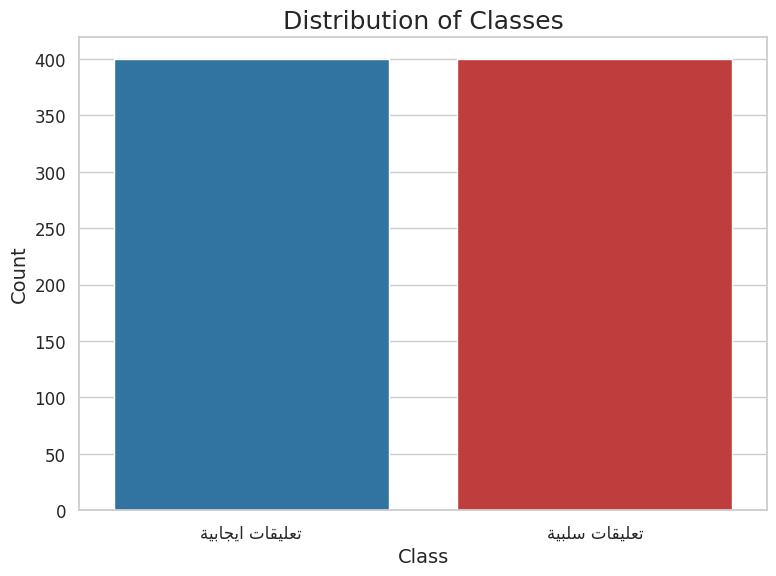

In [4]:
positive = get_display(arabic_reshaper.reshape('ÿ™ÿπŸÑŸäŸÇÿßÿ™ ÿßŸäÿ¨ÿßÿ®Ÿäÿ©'))
negative = get_display(arabic_reshaper.reshape('ÿ™ÿπŸÑŸäŸÇÿßÿ™ ÿ≥ŸÑÿ®Ÿäÿ©'))
                       
# Your class distribution data
class_distribution = data['label'].value_counts()

# Define mapping from numerical labels to Arabic strings
label_mapping = {1: positive, 0: negative}

# Map numerical labels to Arabic strings
class_distribution.index = class_distribution.index.map(label_mapping)

# Plotting
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette=["#1f77b4", "#d62728"])
plt.title('Distribution of Classes', fontsize=18)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)  # Adjust x-axis tick font size
plt.yticks(fontsize=12)  # Adjust y-axis tick font size
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


# Text length distribution

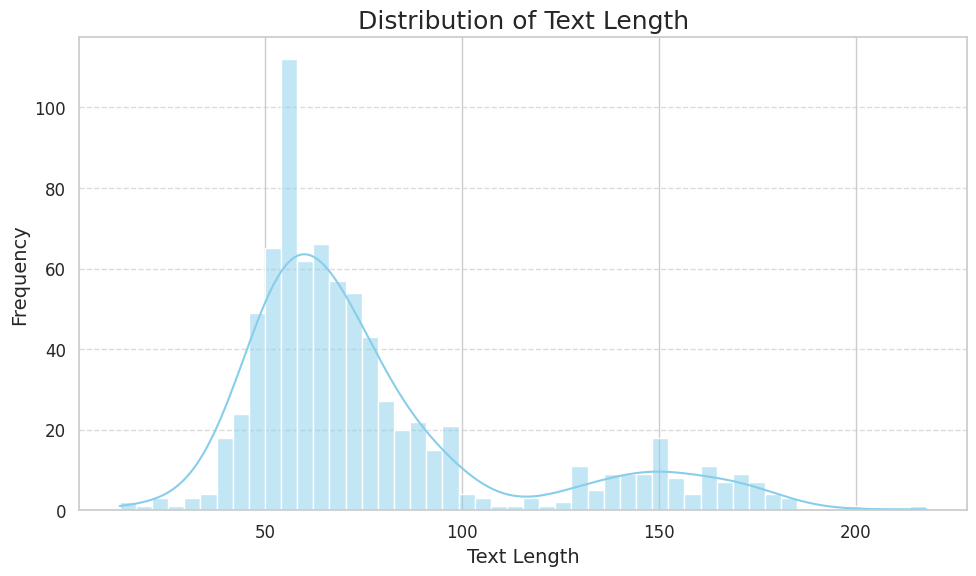

In [5]:
# Calculate text lengths
data['text_length'] = data['review'].apply(len)

# Plotting with Seaborn
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.histplot(data['text_length'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Text Length', fontsize=18)
plt.xlabel('Text Length', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)  # Adjust x-axis tick font size
plt.yticks(fontsize=12)  # Adjust y-axis tick font size
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


# Generate word clouds for each class

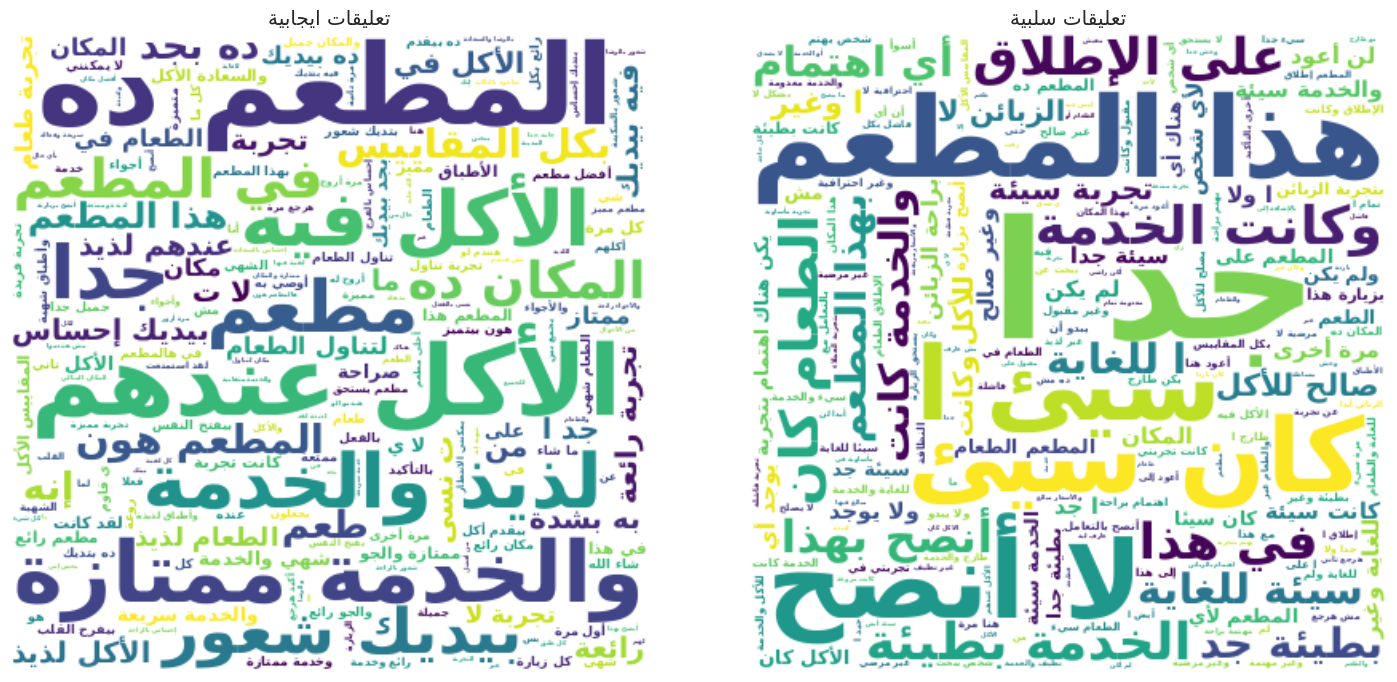

In [6]:

classes = data['label'].unique()
fig, axs = plt.subplots(1, len(classes), figsize=(15, 7))

for i, label in enumerate(classes):
    # Filter reviews based on class label
    reviews = ' '.join(data[data['label'] == label]['review'])
    
    # Generate word cloud
    wordcloud = WordCloud(font_path='/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf',
                          background_color='white',
                          width=400,
                          height=400,
                          max_words=200,
                          contour_color='steelblue').generate(reviews)

    # Display the word cloud
    axs[i].imshow(wordcloud, interpolation='bilinear')
    title = negative if label == 0 else positive
    axs[i].set_title(title)
    axs[i].axis('off')

plt.tight_layout()
plt.show()

# Load  and Finetune Pre-trained Arabert Model

In [7]:
secret_label = 'API_KEY'
API_KEY = UserSecretsClient().get_secret(secret_label)

wandb.login(key=API_KEY)


reviews = data['review'].values
labels = data['label'].values

# Step 2: Load Pre-trained Arabert Model
tokenizer = AutoTokenizer.from_pretrained('aubmindlab/bert-base-arabertv02')
model = AutoModelForSequenceClassification.from_pretrained('aubmindlab/bert-base-arabertv02', num_labels=2)

# Step 3: Define Model Architecture
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Step 4: Prepare Dataset
max_length = 256

# Tokenize and encode the reviews
encoded_reviews = tokenizer(reviews.tolist(), 
                            padding=True, 
                            truncation=True, 
                            max_length=max_length, 
                            return_tensors='pt')

# Create TensorDataset
dataset = TensorDataset(encoded_reviews['input_ids'], 
                        encoded_reviews['attention_mask'], 
                        torch.tensor(labels))

# Split dataset into training and validation sets
test_size = 0.2
train_dataset, val_dataset = train_test_split(dataset, test_size=test_size, random_state=42)

# Step 5: Train the Model
# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=5,              # total number of training epochs
    per_device_train_batch_size=32,  # batch size per device during training
    per_device_eval_batch_size=64,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=10,
    evaluation_strategy="epoch"
)

# Define evaluation function
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc}

# Custom data collator to handle batch processing
class MyDataCollator:
    def __call__(self, features):
        input_ids = [feature[0] for feature in features]
        attention_masks = [feature[1] for feature in features]
        labels = [feature[2] for feature in features]
        return {
            'input_ids': torch.stack(input_ids, dim=0),
            'attention_mask': torch.stack(attention_masks, dim=0),
            'labels': torch.tensor(labels)
        }

# Create Trainer
trainer = Trainer(
    model=model,                         # the instantiated Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=val_dataset,            # evaluation dataset
    compute_metrics=compute_metrics,     # evaluation metrics
    data_collator=MyDataCollator()       # custom data collator
)

# Train the model
trainer.train()

# Save the trained model
model_path = "./trained_model"
model.save_pretrained(model_path)
tokenizer.save_pretrained(model_path)

wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


tokenizer_config.json:   0%|          | 0.00/381 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/825k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.64M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/543M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at aubmindlab/bert-base-arabertv02 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
wandb: Currently logged in as: moazeldsokys9. Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.16.6
wandb: Run data is saved locally in /kaggle/working/wandb/run-20240429_230507-jryeq276
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run fast-oath-10
wandb: ‚≠êÔ∏è View project at https://wandb.ai/moazeldsokys9/huggingface
wandb: üöÄ View run at https://wandb.ai/moazeldsokys9/huggingface/runs/jryeq276


('./trained_model/tokenizer_config.json',
 './trained_model/special_tokens_map.json',
 './trained_model/vocab.txt',
 './trained_model/added_tokens.json',
 './trained_model/tokenizer.json')

In [8]:

# Load the saved model and tokenizer
model_path = "./trained_model"
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path)

# Define the device to run inference on (GPU if available, otherwise CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Move the model to the device
model.to(device)

test_reviews = [
    "ÿßŸÑŸÖÿ∑ÿπŸÖ ŸÖÿß ÿπÿ¨ÿ®ŸÜŸäÿå ÿßŸÑÿ∑ÿπŸÖ ŸÖŸà ÿ≠ŸÑŸà ŸàÿßŸÑÿÆÿØŸÖÿ© ŸÉÿßŸÜÿ™ ÿ≥Ÿäÿ¶ÿ© ÿ¨ÿØÿßŸãÿå ŸàÿßŸÑŸÖŸàÿ∏ŸÅŸäŸÜ ŸÖÿß ŸÉÿßŸÜŸàÿß ŸÖÿ≠ÿ™ÿ±ŸÖŸäŸÜ. ÿßŸÑÿ£ÿ≥ÿπÿßÿ± ÿ∫ÿßŸÑŸäÿ© ŸÖŸÇÿßÿ±ŸÜÿ© ÿ®ÿßŸÑÿ¨ŸàÿØÿ©. ŸÖÿß ÿ®ŸÜÿµÿ≠ ŸÅŸäŸá.",
    "ÿßŸÑŸÖÿ∑ÿπŸÖ Ÿäÿ¨ŸÜŸÜ ŸàÿßŸÑÿßŸÉŸÑ ÿ™ÿ≠ŸÅÿ©",
]

max_length = 256  # Define max length for tokenization

for review in test_reviews:
    # Step 1: Tokenization
    encoded_text = tokenizer(review, padding=True, truncation=True, max_length=max_length, return_tensors='pt')

    # Move input tensors to the appropriate device
    input_ids = encoded_text['input_ids'].to(device)
    attention_mask = encoded_text['attention_mask'].to(device)

    # Step 2: Inference
    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)

    # Step 3: Prediction with probabilities
    probs = torch.softmax(outputs.logits, dim=-1)
    probs = probs.squeeze().cpu().numpy()  # Convert to numpy array and remove the batch dimension

    # Map predicted class index to label
    label_map = {0: 'ÿ≥ŸÑÿ®Ÿä', 1: 'ÿ•Ÿäÿ¨ÿßÿ®Ÿä'}

    # Get predicted class
    predicted_class_index = torch.argmax(torch.tensor(probs)).item()  # Convert probs to tensor before using argmax
    predicted_class = label_map[predicted_class_index]

    print(review)
    # Print predicted class
    print("ÿßŸÑÿ™ÿµŸÜŸäŸÅ ÿßŸÑŸÖÿ™ŸàŸÇÿπ:", predicted_class)

    # Print probabilities for each class
    for i, label in label_map.items():
        print(f"ÿßÿ≠ÿ™ŸÖÿßŸÑŸäÿ© {label}: {probs[i]:.2f}")
    print("")


ÿßŸÑŸÖÿ∑ÿπŸÖ ŸÖÿß ÿπÿ¨ÿ®ŸÜŸäÿå ÿßŸÑÿ∑ÿπŸÖ ŸÖŸà ÿ≠ŸÑŸà ŸàÿßŸÑÿÆÿØŸÖÿ© ŸÉÿßŸÜÿ™ ÿ≥Ÿäÿ¶ÿ© ÿ¨ÿØÿßŸãÿå ŸàÿßŸÑŸÖŸàÿ∏ŸÅŸäŸÜ ŸÖÿß ŸÉÿßŸÜŸàÿß ŸÖÿ≠ÿ™ÿ±ŸÖŸäŸÜ. ÿßŸÑÿ£ÿ≥ÿπÿßÿ± ÿ∫ÿßŸÑŸäÿ© ŸÖŸÇÿßÿ±ŸÜÿ© ÿ®ÿßŸÑÿ¨ŸàÿØÿ©. ŸÖÿß ÿ®ŸÜÿµÿ≠ ŸÅŸäŸá.
ÿßŸÑÿ™ÿµŸÜŸäŸÅ ÿßŸÑŸÖÿ™ŸàŸÇÿπ: ÿ≥ŸÑÿ®Ÿä
ÿßÿ≠ÿ™ŸÖÿßŸÑŸäÿ© ÿ≥ŸÑÿ®Ÿä: 0.99
ÿßÿ≠ÿ™ŸÖÿßŸÑŸäÿ© ÿ•Ÿäÿ¨ÿßÿ®Ÿä: 0.01

ÿßŸÑŸÖÿ∑ÿπŸÖ Ÿäÿ¨ŸÜŸÜ ŸàÿßŸÑÿßŸÉŸÑ ÿ™ÿ≠ŸÅÿ©
ÿßŸÑÿ™ÿµŸÜŸäŸÅ ÿßŸÑŸÖÿ™ŸàŸÇÿπ: ÿ•Ÿäÿ¨ÿßÿ®Ÿä
ÿßÿ≠ÿ™ŸÖÿßŸÑŸäÿ© ÿ≥ŸÑÿ®Ÿä: 0.06
ÿßÿ≠ÿ™ŸÖÿßŸÑŸäÿ© ÿ•Ÿäÿ¨ÿßÿ®Ÿä: 0.94



In [9]:
import zipfile
import os

# Directory containing the trained model and tokenizer
model_path = "./trained_model"

# Zip file name
zip_file_name = "trained_model.zip"

# Zip the directory
with zipfile.ZipFile(zip_file_name, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk(model_path):
        for file in files:
            zipf.write(os.path.join(root, file), os.path.relpath(os.path.join(root, file), os.path.join(model_path, '..')))

print("Model zipped successfully.")

Model zipped successfully.
